In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")


In [5]:
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(0)
df["discount"] = (df["retail_price"] - df["price"])/df["retail_price"]

In [6]:
df["rating_five_percent"] = df["rating_five_count"]/df["rating_count"]
df["rating_four_percent"] = df["rating_four_count"]/df["rating_count"]
df["rating_three_percent"] = df["rating_three_count"]/df["rating_count"]
df["rating_two_percent"] = df["rating_two_count"]/df["rating_count"]
df["rating_one_percent"] = df["rating_one_count"]/df["rating_count"]

In [7]:
ratings = [
    "rating_five_percent",
    "rating_four_percent",
    "rating_three_percent",
    "rating_two_percent",
    "rating_one_percent"
]
for rating in ratings:
    df[rating] = df[rating].apply(lambda x: x if x>= 0 and x<= 1 else 0)

d:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

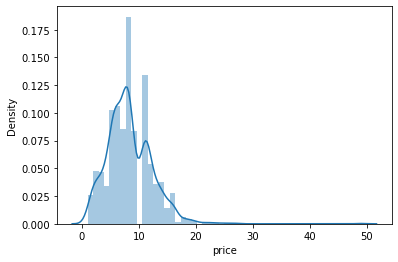

In [8]:
import seaborn as sns
# Distribution plot on price
sns.distplot(df['price'])

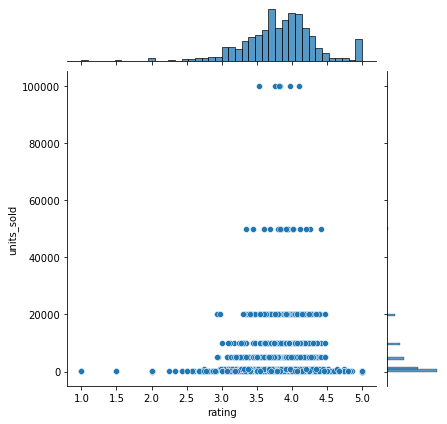

In [9]:
sns.jointplot(x = "rating", y = "units_sold", data = df, kind = "scatter")

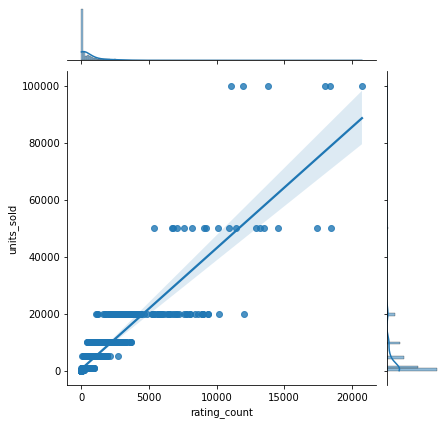

In [10]:
sns.jointplot(x = "rating_count", y = "units_sold", data = df, kind = "reg")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Divide the data between units sold and influencing factors
X = df.filter([
    "price",
    "discount",
    "uses_ad_boosts",
    "rating",
    "rating_count",
    "rating_five_percent",
    "rating_four_percent",
    "rating_three_percent",
    "rating_two_percent",
    "rating_one_percent",
    "has_urgency_banner",
    "merchant_rating",
    "merchant_rating_count",
    "merchant_has_profile_picture"
])
Y = df["units_sold"]
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 42)

In [12]:
# Set up and run the model
RFRegressor = RandomForestRegressor(n_estimators = 20)
RFRegressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20)

In [13]:
predictions = RFRegressor.predict(X_test)
error = Y_test - predictions

In [15]:
print(predictions)

[4.600e+01 6.000e+03 9.250e+01 1.000e+03 2.650e+03 1.000e+02 8.850e+01
 8.650e+02 4.650e+03 8.000e+01 9.750e+01 1.200e+04 5.100e+01 1.450e+02
 2.150e+04 6.000e+01 7.000e+03 2.050e+03 1.405e+03 6.125e+02 1.000e+03
 3.300e+03 1.450e+02 1.000e+03 9.750e+01 2.350e+02 2.350e+02 2.400e+03
 9.750e+03 9.250e+01 1.000e+03 1.000e+02 1.000e+02 8.800e+01 1.000e+02
 1.000e+02 6.400e+02 1.100e+04 1.325e+04 3.250e+03 9.250e+01 2.250e+03
 1.000e+03 3.250e+02 1.000e+02 5.500e+02 1.000e+02 1.400e+03 2.050e+03
 1.000e+03 9.500e+01 7.500e+03 6.050e+03 1.000e+03 7.150e+01 6.500e+01
 1.000e+03 2.700e+04 1.355e+03 1.300e+02 2.800e+02 3.600e+01 1.000e+03
 9.500e+03 1.000e+02 3.250e+02 7.300e+02 9.550e+01 1.000e+02 6.370e+01
 5.050e+02 5.350e+03 9.550e+02 1.850e+03 6.000e+04 9.750e+03 8.200e+02
 5.800e+03 9.250e+03 9.100e+02 8.650e+02 1.000e+03 3.850e+03 7.300e+02
 1.150e+04 1.000e+02 1.000e+02 5.500e+02 8.650e+02 2.800e+02 7.500e+03
 9.500e+01 7.750e+02 6.750e+01 4.580e+01 1.575e+04 8.200e+02 1.000e+02
 1.000

In [16]:
print(error)

1120       4.00
810     4000.00
1339       7.50
534        0.00
514     2350.00
         ...   
126      -12.45
901    -2400.00
1219    -400.00
355        5.95
1280   -2500.00
Name: units_sold, Length: 520, dtype: float64
